In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import datetime
import warnings
warnings.filterwarnings('ignore')




In [7]:
df=pd.read_csv("lung_cancer_examples.csv",index_col=False)

In [8]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [9]:
df.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [10]:
df.describe


<bound method NDFrame.describe of            Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0          John         Wick   35       3      5       4       1
1          John  Constantine   27      20      2       5       1
2        Camela     Anderson   30       0      5       2       0
3          Alex       Telles   28       0      8       1       0
4         Diego     Maradona   68       4      5       6       1
5     Cristiano      Ronaldo   34       0     10       0       0
6        Mihail          Tal   58      15     10       0       0
7         Kathy        Bates   22      12      5       2       0
8        Nicole       Kidman   45       2      6       0       0
9           Ray      Milland   52      18      4       5       1
10      Fredric        March   33       4      8       0       0
11          Yul      Brynner   18      10      6       3       0
12         Joan     Crawford   25       2      5       1       0
13         Jane        Wyman   28      20      2       8

In [11]:
df.info

<bound method DataFrame.info of            Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0          John         Wick   35       3      5       4       1
1          John  Constantine   27      20      2       5       1
2        Camela     Anderson   30       0      5       2       0
3          Alex       Telles   28       0      8       1       0
4         Diego     Maradona   68       4      5       6       1
5     Cristiano      Ronaldo   34       0     10       0       0
6        Mihail          Tal   58      15     10       0       0
7         Kathy        Bates   22      12      5       2       0
8        Nicole       Kidman   45       2      6       0       0
9           Ray      Milland   52      18      4       5       1
10      Fredric        March   33       4      8       0       0
11          Yul      Brynner   18      10      6       3       0
12         Joan     Crawford   25       2      5       1       0
13         Jane        Wyman   28      20      2       8  

In [12]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

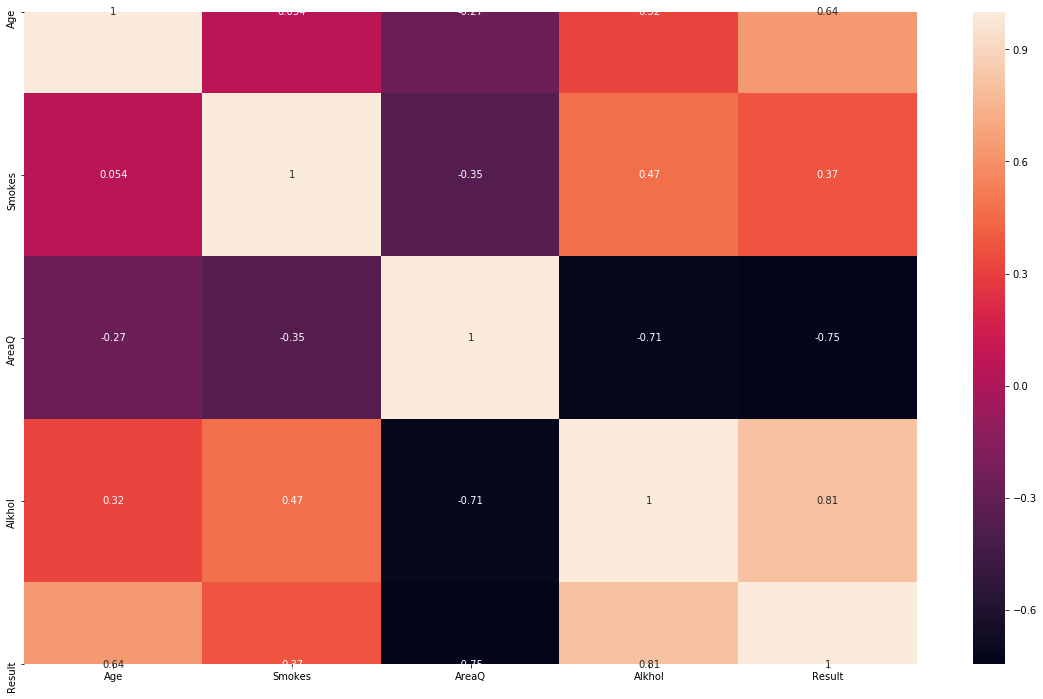

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [14]:
df.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

In [15]:
df.corr()

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


In [16]:
df.skew()

Age       0.496293
Smokes   -0.149071
AreaQ    -0.020339
Alkhol    0.469953
Result    0.104502
dtype: float64

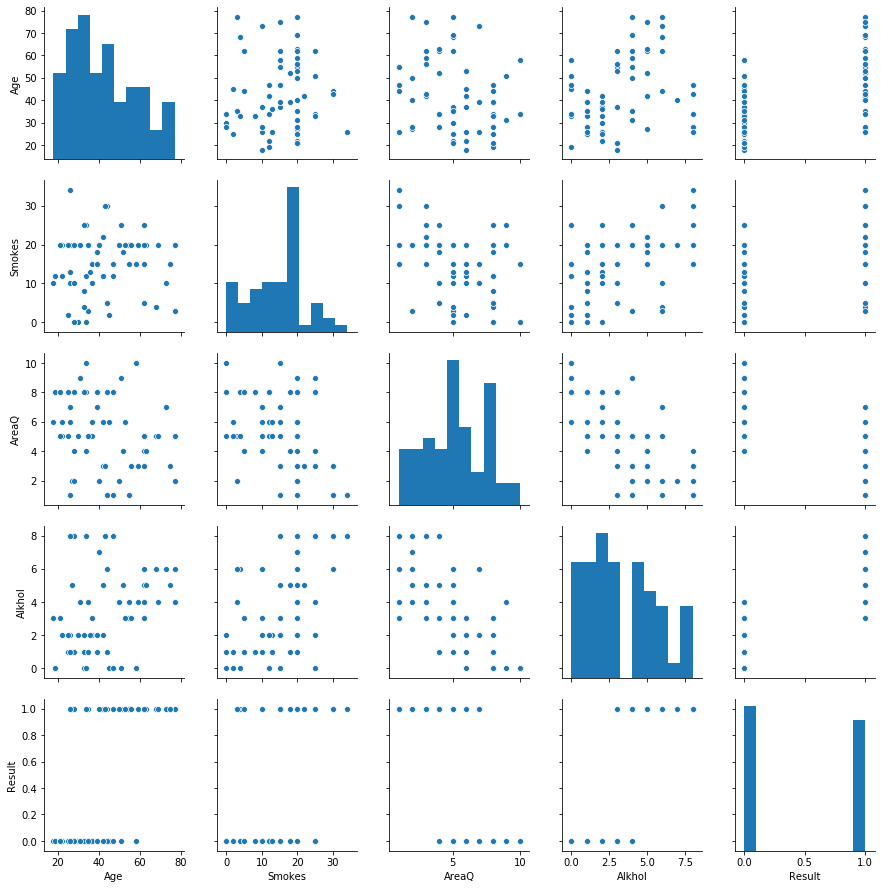

In [17]:
sns.pairplot(df)

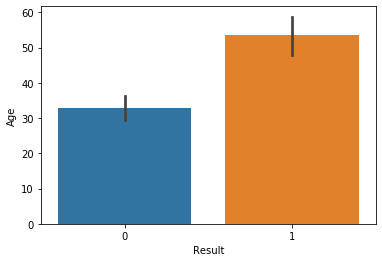

In [18]:
sns.barplot(x="Result",y="Age",data=df)
plt.show()

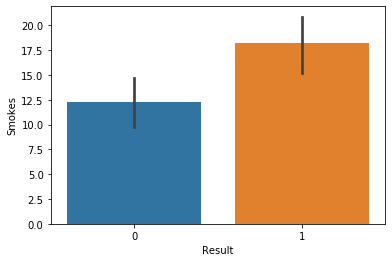

In [19]:
sns.barplot(x="Result",y="Smokes",data=df)
plt.show()

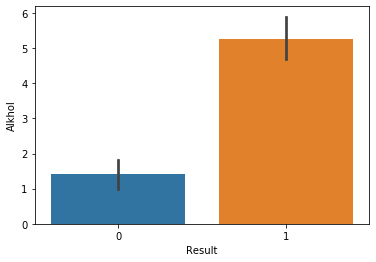

In [20]:
sns.barplot(x="Result",y="Alkhol",data=df)
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Name"] = le.fit_transform(df["Names"])
df[["Name", "Names"]].head(11)

KeyError: 'Names'

In [ ]:
df.head()

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Surnames"] = le.fit_transform(df["Surname"])
df[["Surname", "Surnames"]].head(11)

,Surname,Surnames
0,Wick,47
1,Constantine,7
2,Anderson,0
3,Telles,44
4,Maradona,28
5,Ronaldo,36
6,Tal,43
7,Bates,1
8,Kidman,24
9,Milland,31


In [23]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result,Surnames
0,John,Wick,35,3,5,4,1,47
1,John,Constantine,27,20,2,5,1,7
2,Camela,Anderson,30,0,5,2,0,0
3,Alex,Telles,28,0,8,1,0,44
4,Diego,Maradona,68,4,5,6,1,28


In [24]:
df=df.drop(columns=["Name"])

In [25]:
df.head()

,Surname,Age,Smokes,AreaQ,Alkhol,Result,Surnames
0,Wick,35,3,5,4,1,47
1,Constantine,27,20,2,5,1,7
2,Anderson,30,0,5,2,0,0
3,Telles,28,0,8,1,0,44
4,Maradona,68,4,5,6,1,28


In [26]:
df=df.drop(columns=["Surname"])

In [27]:
df.head()

,Age,Smokes,AreaQ,Alkhol,Result,Surnames
0,35,3,5,4,1,47
1,27,20,2,5,1,7
2,30,0,5,2,0,0
3,28,0,8,1,0,44
4,68,4,5,6,1,28


In [28]:
x=df.drop(columns=["Result"])
y=df[["Result"]]

In [29]:
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [30]:
x_train.shape

(47, 5)

In [31]:
x_test.shape

(12, 5)

In [32]:
y_train.shape

(47, 1)

In [33]:
y_test.shape

(12, 1)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,classification_report
lg=LogisticRegression()

In [35]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lg.score(x_train,y_train)

1.0

In [37]:

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(lg, x, y, cv=10)
metrics.accuracy_score(y, predicted) 

from sklearn.model_selection import cross_validate
accuracy = cross_val_score(lg, x, y, cv=10,scoring='accuracy')
print (accuracy)
print (cross_val_score(lg, x, y, cv=10,scoring='accuracy').mean())

[0.66666667 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
0.9666666666666666


In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(lg, x, y, cv=10, scoring='accuracy').mean())

0.9666666666666666


In [39]:
pred=lg.predict(x_test)
print(pred)

[1 1 0 0 1 0 0 1 0 1 0 0]


In [40]:
print("accuracy_score",accuracy_score(pred,y_test))

accuracy_score 1.0


In [41]:
print(confusion_matrix(y_test,pred))

[[7 0]
 [0 5]]


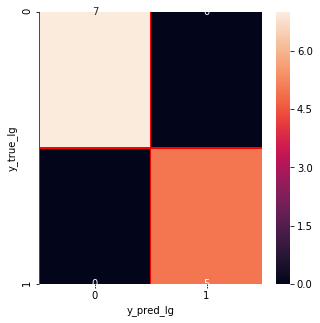

In [42]:
from sklearn.metrics import confusion_matrix
y_pred_lg = lg.predict(x_test)
y_true_lg = y_test
cm = confusion_matrix(y_true_lg, y_pred_lg)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lg")
plt.ylabel("y_true_lg")
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 83.33%


In [44]:
from sklearn.externals import joblib
joblib.dump(lg, "lg_LungCancer.pk1")

['lg_LungCancer.pk1']